## **Image classification of CIFAR-10 using TensorFlow.**

About: The **CIFAR-10 dataset (Canadian Institute For Advanced Research)** is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. **The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks**. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

**Problem Statement: To predict correct label for each image given in test dataset.**

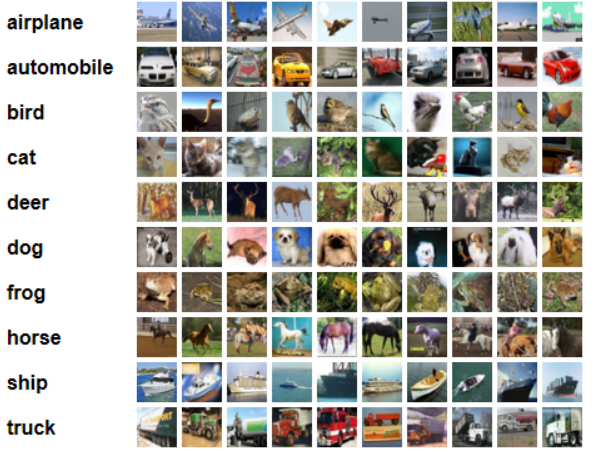

[**Convolutional Neural Network(CNNs)**](https://www.geeksforgeeks.org/introduction-convolution-neural-network/)
State-of-the-art image classfication is performed with [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs) that use convolution layers to extract features from images and pooling layers to downsize images so features can be detected at various resolutions. Let's use Tensorflow to build a CNN and train it to differentiate between photos containing Arctic foxes, polar bears, and walruses. CNNs perform best when trained with thousands (or tens of thousands) of images per class.

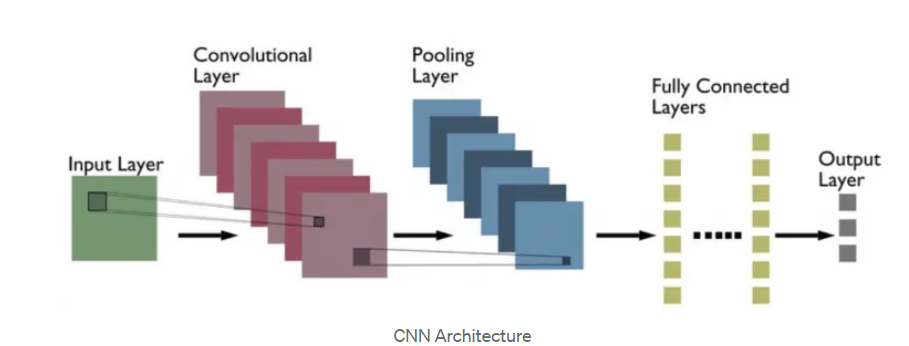



**Batch normalization is a supervised learning method for normalizing the interlayer outputs of a neural network.**

**The term "dropout" refers to dropping out units (both hidden and visible) in a neural network**




**Importing Packages**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, Input, GlobalMaxPooling2D
from tensorflow.keras import Model


**Layers:**

**Batch normalization is a supervised learning method for normalizing the interlayer outputs of a neural network.**   

**The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.**

**The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarizing the features lying within the region covered by the filter.**


**A 2-D global max pooling layer performs downsampling by computing the maximum of the height and width dimensions of the input.**





Version of Tensorflow

In [4]:
tf.__version__

'2.17.0'

The dataset of **CIFAR-10** is available on tensorflow keras API and we can download  from it.

The distribute to train set and test set
train=(x_train, y_train), test=(x_test, y_test)

**dividing train and test images by 255.0**
the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [5]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


we have seen that 5000 training images and 1000 test images as with all the images size of 32*32 and have 3 color channels that with color imges that is  RGB(red,blue,green).

Loading The dataset

In [6]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Another thing we want to do is to flatten(in simple words rearrange them in form of a row) the label values using the flatten() function.


**flattening** refers to the process of converting all of the multi-dimensional features into a one-dimensional vector(reduces the dimensionality of the data).

In [7]:
y_train = y_train.flatten()
y_test = y_test.flatten()

The images size with 32*32 so don’t expect much from the image. It would be a blurred one.
we can visualize the first 25 images from our training datasets.
with subplot of 5 * 5.

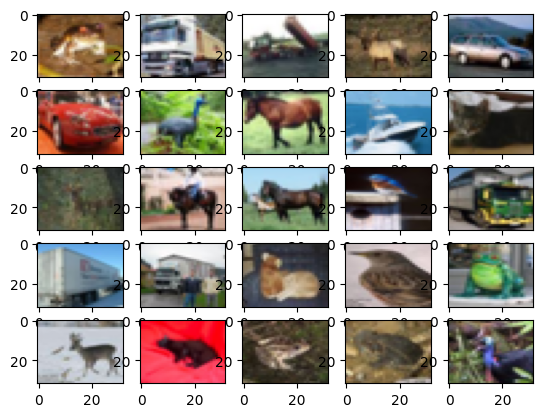

In [8]:
fig, ax = plt.subplots(5, 5,)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[k],aspect='auto')
        k += 1
plt.show()


After completing all the steps now it time to build the model. we are using **CNN model that is Convolutional Neural Network** to train our model.

It includes using a convolution layer in this which is Conv2d layer as well as pooling and normalization methods. Finally, it passes into a dense layer and the final dense layer which is our output layer. we are using activation function that is **"RELU"** and output layer uses a **"softmax function"**.

Building The CNN model.

In [9]:
#Number of classes
k=len(set(y_train))

print("number of classes",k)

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

#==============================================================

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

#==============================================================

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(k, activation='softmax')(x)

model = Model(i,x)

model.summary()



number of classes 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

Now, it time to compile our model. We are using model.compile() function to compile our model. for the parameters, we are using



*   [adam](https://en.wikipedia.org/wiki/Adam) (Adaptive Moment Estimation) to optimize the good Perfromance of model.
*   sparse_categorical_crossentropy as the loss function.
*   metrics=[‘accuracy’]






Compile The Model

In [10]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Now let’s fit our model using model.fit() passing all our data to it. We are going to train our model till 40 epochs, it gives us a fair result though you can tweak it if you want.

Initially, as the **number of epochs increases**, the model learns more from the training data, and the prediction accuracy on both the training and validation datasets tends to improve. This is because the model gets more opportunities to adjust its weights and biases to minimize the loss function.

Fit The model.

In [11]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)



Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 410s 259ms/step - accuracy: 0.4338 - loss: 1.8601 - val_accuracy: 0.6102 - val_loss: 1.1643
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 406s 260ms/step - accuracy: 0.6799 - loss: 0.9475 - val_accuracy: 0.6756 - val_loss: 0.9683
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 440s 259ms/step - accuracy: 0.7593 - loss: 0.7017 - val_accuracy: 0.7059 - val_loss: 0.8444
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 402s 257ms/step - accuracy: 0.8075 - loss: 0.5639 - val_accuracy: 0.7667 - val_loss: 0.6899
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 258ms/step - accuracy: 0.8426 - loss: 0.4546 - val_accuracy: 0.7269 - val_loss: 0.8624
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 440s 256ms/step - accuracy: 0.8630 - loss: 0.3937 - val_accuracy: 0.7880 - val_loss: 0.6506
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 400s 256ms/step - accuracy: 0.8884 - loss: 0.3174 - val_accuracy: 0.7868 - val_loss: 0.6954
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 256ms/step - ac

After this, our model is trained. Though it will work fine but to make our model much more accurate we can add data augmentation on our data and then train it again. Calling model.fit() again on augmented data will continue training where it left off. We are going to fit our data on a batch size of 32 and we are going to shift the range of width and height by 0.1 and flip the images horizontally. Then call model.fit again for 40 epochs.

**Data augmentation** is a technique used in deep learning to artificially increase the size and variability of a training dataset by making small changes to existing data. It's a common practice in deep learning because it can help improve model performance and prevent overfitting.

In [12]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

#r = model.fit(train_generator, validation_data=(x_test, y_test),
#steps_per_epoch=steps_per_epoch, epochs=50)


r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=30)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 437s 279ms/step - accuracy: 0.8072 - loss: 0.7076 - val_accuracy: 0.8246 - val_loss: 0.5354
Epoch 2/30
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 6:08 236ms/step - accuracy: 0.8750 - loss: 0.3238

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8750 - loss: 0.3238 - val_accuracy: 0.8265 - val_loss: 0.5330
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 477s 275ms/step - accuracy: 0.8405 - loss: 0.4612 - val_accuracy: 0.8216 - val_loss: 0.5482
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8750 - loss: 0.4602 - val_accuracy: 0.8213 - val_loss: 0.5511
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 488s 278ms/step - accuracy: 0.8528 - loss: 0.4274 - val_accuracy: 0.8200 - val_loss: 0.5363
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8438 - loss: 0.5095 - val_accuracy: 0.8191 - val_loss: 0.5399
Epoch 7/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 482s 277ms/step - accuracy: 0.8574 - loss: 0.4076 - val_accuracy: 0.8341 - val_loss: 0.5053
Epoch 8/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8750 - loss: 0.4101 - val_accuracy: 0.8343 - val_loss: 0.5062
Epoch 9/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 482s 276ms/step - accuracy: 0.8636 - lo

Now we have trained our model, before making any predictions from it let’s visualize the accuracy per iteration for better analysis. Though there are other methods that include confusion matrix for better analysis of the model.

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


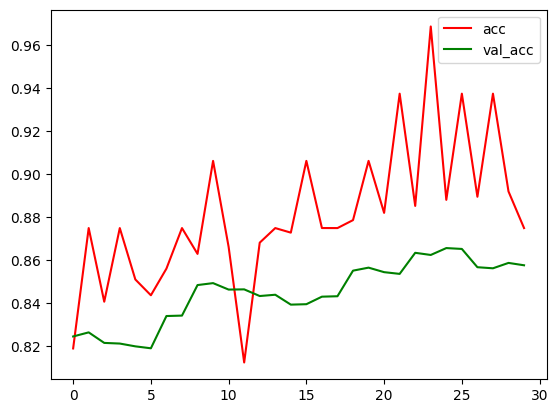

In [28]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


Let’s make a prediction over an image from our model using model.predict() function. Before sending the image to our model we need to again reduce the pixel values between 0 and 1 and change its shape to (1,32,32,3) as our model expects the input to be in this form only. To make things easy let us take an image from the dataset itself. It is already in reduced pixels format still we have to reshape it (1,32,32,3) using reshape() function. Since we are using data from the dataset we can compare the predicted output and original output.

Predicting and Display the result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Original label is cat and predicted label is cat


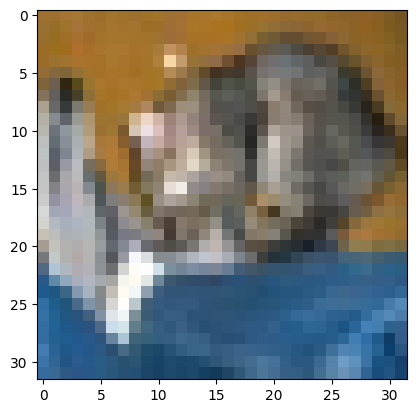

In [14]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [30]:
# Evaluate model accuracy on test data
test_acc=accuracy, val_accuracy = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8581 - loss: 0.4296
Test accuracy: [0.43659135699272156, 0.857699990272522]


In [32]:
# Evaluate model accuracy on train data
train_acc=accuracy, val_accuracy = model.evaluate(x_train, y_train)

print(f"Train accuracy: {train_acc}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.9372 - loss: 0.1809
Train accuracy: [0.1818045675754547, 0.9368799924850464]


Save and load the weights of the model in h5 file name with "ICBT.h5".

In [19]:
model.save("ICBT.h5")

In [27]:
model.load_weights("ICBT.h5")